In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import os
def plot(loss_base, loss_gp, shift, name):
    plt.plot(shift, loss_base, marker = 'o', label = 'No gradient penalisation')
    plt.plot(shift, loss_gp, marker = 'x', label = 'Gradient penalisation 1e-2')
    plt.legend()
    plt.ylabel('Loss for parameter prediction')
    plt.xlabel(name)
    plt.show()
def plot_diff(loss_base, loss_gp, shift, name):
    plt.plot(shift, torch.tensor(loss_base) - torch.tensor(loss_gp), marker = 'x', color = 'r')
    plt.ylabel('Loss for parameter prediction')
    plt.xlabel(name)
    plt.show()
    
def plot_with_std(A,B, shift, name, save):
    plt.figure(figsize = (4,3.5))
    A_mean = A.mean(axis = 0)
    B_mean = B.mean(axis = 0)
    A_std = A.std(axis = 0)/np.sqrt(len(A))
    B_std = B.std(axis = 0)/np.sqrt(len(B))
    
    col = '#1f77b4'
    col2 = '#ff7f0e'

    plt.plot(shift, A_mean, marker = 'o')
    plt.fill_between(shift, A_mean -A_std, A_mean + A_std, alpha = 0.15, color = col)
    plt.plot(shift, B_mean, marker = 'x')
    plt.fill_between(shift, B_mean -B_std, B_mean + B_std, alpha = 0.15, color = col2)
    plt.legend(['No gradient\npenalty', 'Gradient penalty'], fontsize=12, frameon=False)
    plt.xlabel(name)
    plt.ylabel('Test squared error loss')
    destination = os.path.join('./figures', save)
    plt.savefig(destination, dpi = 150, bbox_inches="tight")

    plt.show()
def plot_diff2(loss_base, loss_gp, shift, name, save):
    plt.figure(figsize = (4,3.5))
    plt.plot(shift, torch.tensor(loss_base).mean(dim = 0) - torch.tensor(loss_gp).mean(dim = 0), marker = 'x', color = 'r')
    plt.ylabel('Test squared error loss')
    plt.xlabel(name)
    destination = os.path.join('./figures', save)
    plt.savefig(destination, dpi = 150, bbox_inches="tight")
    plt.show()

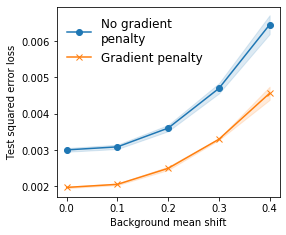

In [3]:
loss_base = torch.tensor([[0.0029567673336714506, 0.002998021664097905, 0.003560829907655716, 0.004764759913086891, 0.006952500902116299],
[0.002949418965727091, 0.0030649411492049694, 0.003482385305687785, 0.004431786481291056, 0.006065180990844965],
[0.0031058872118592262, 0.003200183156877756, 0.0037721905391663313, 0.004901260137557983, 0.006348814815282822]])
loss_gp = torch.tensor([[0.0019314695382490754, 0.00206294865347445, 0.0024235150776803493, 0.0032548720482736826, 0.004284074064344168],
[0.001976934028789401, 0.0020873802714049816, 0.00258309836499393, 0.003325105644762516, 0.004502951167523861],
[0.0020017048809677362, 0.0020142747089266777, 0.002481376752257347, 0.0033135367557406425, 0.004908571485430002]])

shift = torch.linspace(0, 0.4, 5)
plot_with_std(loss_base, loss_gp, shift, 'Background mean shift', 'back_mean_shift')

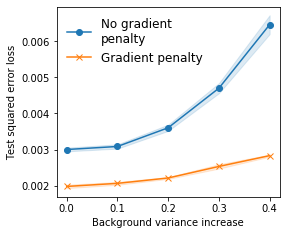

In [4]:
loss_base = torch.tensor([[0.0031058872118592262, 0.003200183156877756, 0.0037721905391663313, 0.004901260137557983, 0.006348814815282822],
[0.002949418965727091, 0.0030649411492049694, 0.003482385305687785, 0.004431786481291056, 0.006065180990844965],
[0.0029567673336714506, 0.002998021664097905, 0.003560829907655716, 0.004764759913086891, 0.006952500902116299]])
loss_gp = torch.tensor([[0.002076049568131566, 0.002119573298841715, 0.002264609793201089, 0.0026450268924236298, 0.002891138894483447],
[0.001919793663546443, 0.0020960394758731127, 0.002209702041000128, 0.0025252732448279858, 0.002806547097861767],
[0.0019537601619958878, 0.0019903378561139107, 0.0021770144812762737, 0.002436981536448002, 0.0028067664243280888]])
shift = torch.linspace(0,0.4,5)
plot_with_std(loss_base, loss_gp, shift, 'Background variance increase', 'back_var_shift')